# Loan Default Prediction

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [1]:
applicant = '/home/hp/Documents/College/Coding/loan default prediction/data/applicant.csv'
loan = '/home/hp/Documents/College/Coding/loan default prediction/data/loan.csv'

In [4]:
applicant_df = pd.read_csv(applicant)
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [5]:
loan_df = pd.read_csv(loan)
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [6]:
data = pd.merge(applicant_df, loan_df, 
                on = 'applicant_id',
                how = 'inner')

data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [7]:
data.high_risk_applicant.value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

In [8]:
#making a copy of the dataset
data_copy = data.copy()
data_copy.shape

(1000, 27)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [10]:
data.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
data.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [12]:
data.Other_EMI_plans.value_counts().sum()

186

In [13]:
data.drop(['applicant_id','Years_at_current_residence','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Telephone','Balance_in_existing_bank_account_(upper_limit_of_bucket)','loan_application_id','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Other_EMI_plans'], axis=1, inplace=True)

In [14]:
data.shape

(1000, 18)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Primary_applicant_age_in_years               1000 non-null   int64 
 1   Gender                                       1000 non-null   object
 2   Marital_status                               1000 non-null   object
 3   Number_of_dependents                         1000 non-null   int64 
 4   Housing                                      1000 non-null   object
 5   Employment_status                            1000 non-null   object
 6   Foreign_worker                               1000 non-null   int64 
 7   Savings_account_balance                      817 non-null    object
 8   Months_loan_taken_for                        1000 non-null   int64 
 9   Purpose                                      988 non-null    object
 10  Principal_loa

In [16]:
pd.crosstab(data.Gender, data.high_risk_applicant)

high_risk_applicant,0,1
Gender,,
female,201,109
male,499,191


In [17]:
pd.crosstab(data.Employment_status,data.high_risk_applicant)

high_risk_applicant,0,1
Employment_status,,
management / self-employed / highly qualified employee / officer,97,51
skilled employee / official,444,186
unemployed / unskilled - non-resident,15,7
unskilled - resident,144,56


Text(0, 0.5, 'high risk applicant')

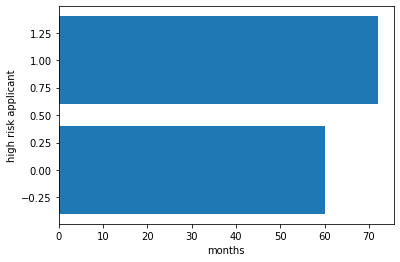

In [18]:
plt.figure()
plt.barh(data.high_risk_applicant,data.Months_loan_taken_for)
plt.xlabel('months')
plt.ylabel('high risk applicant')

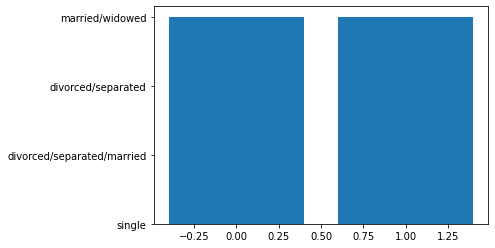

In [19]:
plt.figure()
plt.bar(data.high_risk_applicant, data.Marital_status)
plt.show()

In [20]:
pd.crosstab(data.Marital_status, data.high_risk_applicant)

high_risk_applicant,0,1
Marital_status,,
divorced/separated,30,20
divorced/separated/married,201,109
married/widowed,67,25
single,402,146


In [32]:
data.Primary_applicant_age_in_years.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Primary_applicant_age_in_years, dtype: float64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Primary_applicant_age_in_years               1000 non-null   int64 
 1   Gender                                       1000 non-null   object
 2   Marital_status                               1000 non-null   object
 3   Number_of_dependents                         1000 non-null   int64 
 4   Housing                                      1000 non-null   object
 5   Employment_status                            1000 non-null   object
 6   Foreign_worker                               1000 non-null   int64 
 7   Savings_account_balance                      817 non-null    object
 8   Months_loan_taken_for                        1000 non-null   int64 
 9   Purpose                                      988 non-null    object
 10  Principal_loa

<AxesSubplot:>

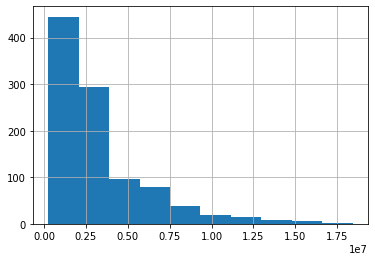

In [22]:
data.Principal_loan_amount.hist()

In [25]:
data.Principal_loan_amount.describe()

count    1.000000e+03
mean     3.271258e+06
std      2.822737e+06
min      2.500000e+05
25%      1.365500e+06
50%      2.319500e+06
75%      3.972250e+06
max      1.842400e+07
Name: Principal_loan_amount, dtype: float64

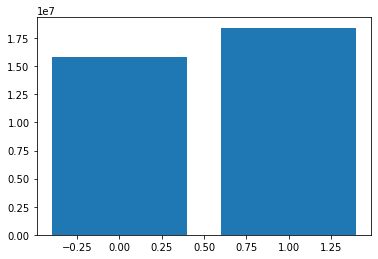

In [24]:
plt.figure()
plt.bar(data.high_risk_applicant, data.Principal_loan_amount)
plt.show()

<AxesSubplot:>

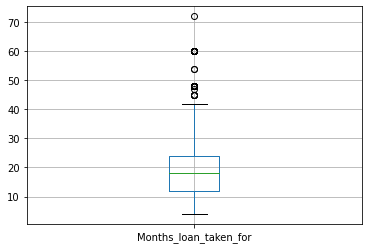

In [94]:
data.boxplot(column='Months_loan_taken_for')

#### many outliers in months_loan_taken_for

<AxesSubplot:>

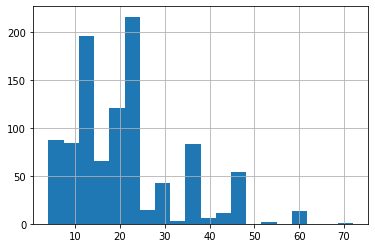

In [95]:
#check an histogram for the same
data.Months_loan_taken_for.hist(bins=20)

In [33]:
data.Months_loan_taken_for.describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Months_loan_taken_for, dtype: float64

In [96]:
data.Loan_history.value_counts()

existing loans paid back duly till now     530
critical/pending loans at other banks      293
delay in paying off loans in the past       88
all loans at this bank paid back duly       49
no loans taken/all loans paid back duly     40
Name: Loan_history, dtype: int64

In [97]:
#converting the non numeric columns into pandas categories
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Primary_applicant_age_in_years               1000 non-null   int64   
 1   Gender                                       1000 non-null   category
 2   Marital_status                               1000 non-null   category
 3   Number_of_dependents                         1000 non-null   int64   
 4   Housing                                      1000 non-null   category
 5   Employment_status                            1000 non-null   category
 6   Foreign_worker                               1000 non-null   int64   
 7   Savings_account_balance                      817 non-null    category
 8   Months_loan_taken_for                        1000 non-null   int64   
 9   Purpose                                      988 non-null    cat

## Filling Missing Values

In [99]:
#checking how many numeric columns have missing data
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

no numeric missing data

#### Checking for non numeric data

In [100]:
#check all the non numeric null variables
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Savings_account_balance
Purpose
Property


In [101]:
#turning categorical values into numbers and filling the missing data
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes+1

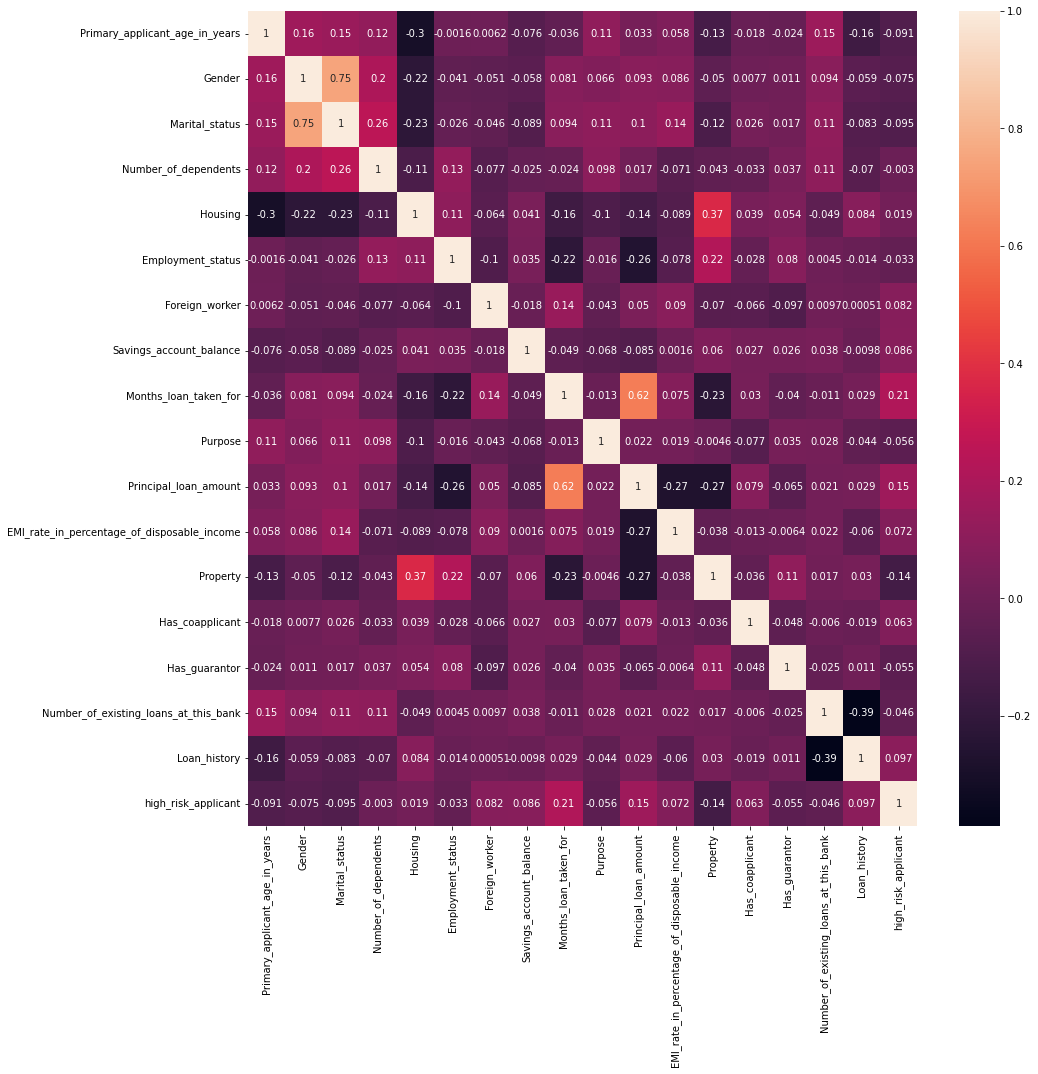

In [102]:
#checking the corelation matrix
plt.figure(figsize=(15,15))
dataplot = sns.heatmap(data.corr(), annot=True)

plt.show()

In [103]:
#Split into X & y
X = data.drop('high_risk_applicant', axis=1)
y = data.high_risk_applicant

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [104]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Fitting Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [107]:
y_preds = DTClassifier.predict(X_test)

In [109]:
from sklearn import metrics
Decision_tree_accuracy = metrics.accuracy_score(y_pred=y_preds, y_true=y_test)
Decision_tree_accuracy

0.67

## Fitting Random Forest Classifier


In [110]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_jobs=-1, random_state=42)
RFClassifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [112]:
y_preds_rf = RFClassifier.predict(X_test)


In [119]:
Random_Forest_accuracy = metrics.accuracy_score(y_pred=y_preds_rf, y_true=y_test)
Random_Forest_accuracy

0.715

#### Fitting Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

y_preds_nb = NBClassifier.predict(X_test)



In [120]:
Naive_Bayes_accuracy = metrics.accuracy_score(y_pred=y_preds_nb, y_true=y_test)
Naive_Bayes_accuracy

0.68

## Fitting Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_preds_lr = LR.predict(X_test)

In [122]:
LR_accuracy = metrics.accuracy_score(y_pred=y_preds_lr, y_true=y_test)
LR_accuracy

0.695

since random forest has the best accuracy,lets perform hyperparameter tuning to check if we can improve results

In [132]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    'n_estimators' : np.arange(10,100,10),
    'max_depth' : [None, 3,5,10,14],
    'min_samples_split' : np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,20,2),
    'max_features' : [0,1,'sqrt','auto'],
}

#instantiating the RandomizedSearchCV Model
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=20, cv=5, verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 14],
                                        'max_features': [0, 1, 'sqrt', 'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [128]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 14}

In [129]:
y_preds_rs = rs_model.predict(X_test)

In [130]:
rs_model_accuracy = metrics.accuracy_score(y_pred=y_preds_rs, y_true=y_test)
rs_model_accuracy

0.765

In [137]:
accuracies = {
            'Classifier' : ['Decision Tree', 'Random Forest', 'Random Forest - hyperparameter tuned', 'Naive Bayes', 'Logistic Regression'],
            'Accuracy' : [Decision_tree_accuracy, Random_Forest_accuracy, rs_model_accuracy, Naive_Bayes_accuracy, LR_accuracy]   }
Accuracy_score = pd.DataFrame(accuracies)
Accuracy_score

,Classifier,Accuracy
0,Decision Tree,0.670
1,Random Forest,0.715
2,Random Forest - hyperparameter tuned,0.765
3,Naive Bayes,0.680
4,Logistic Regression,0.695


### Feature Importance

In [142]:
RFClassifier.feature_importances_

array([0.14171653, 0.01954992, 0.03845572, 0.01657357, 0.03343466,
       0.04104303, 0.00361961, 0.05972776, 0.13457572, 0.08656231,
       0.18859449, 0.05164486, 0.05818499, 0.01114455, 0.0097775 ,
       0.03144943, 0.07394535])

In [138]:
#Plot a helper function to vizualize the feature importances mapping to each column
def plot_features(columns, importances): #only mapping the top 20 features
    df = (pd.DataFrame({
        'features' : columns,
        'feature_importances' : importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))

    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'], df['feature_importances'])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

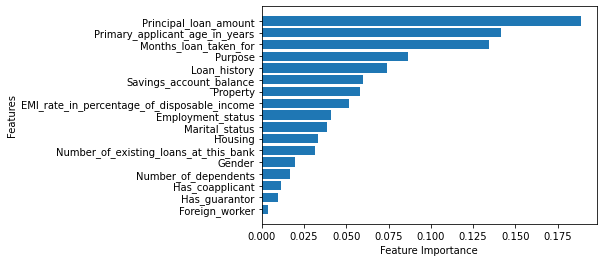

In [143]:
plot_features(X_train.columns,RFClassifier.feature_importances_ )